## Life Cycle of Data Science 

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

1. 'battery_power' -battery_power
2. 'blue' -bluetooth
3. 'clock_speed' -clock_speed
4. 'dual_sim' -sim
5. 'fc' - Front Screen
6. 'four_g'- 4G Connection
7. 'int_memory'- Internal Memory
8. 'm_dep'- Slimness
9. 'mobile_wt' -Weight
10. 'n_cores'- Processor
11. 'pc'- Primary camera
12. 'px_height' -Pixel hight
13. 'px_width' - Pixel Width
14. 'ram' - ram size
15. 'sc_h'- screen hight
16. 'sc_w'- screen width
17. 'talk_time'- talk time
18. 'three_g'- 3G
19. 'touch_screen'- Touch facility
20. 'wifi' - wifi
21. 'price_range'- price

In [82]:
## Data Analysis
## Main Aim is to understand about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [83]:
dataset = pd.read_csv('train.csv')
print(dataset.shape)
dataset.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

we are having 21 columns all are 
###### Numerical values 
######  Having NO Null values

In [85]:
## Since we are going to predict price, lets analyse based on price_range 

dataset['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

we can see the values is not numerical, it is classified into four categories having count of 500 each

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'price_range')

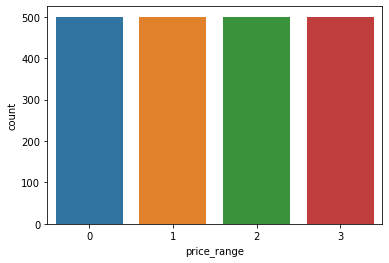

In [86]:
sns.countplot(dataset['price_range'])
plt.xlabel('price_range')


lets count the unique values of all columns to find the discreate numerical variable

In [87]:
for i in dataset.columns:
    if len(dataset[i].unique()) < 100 and i != 'price_range' :
        print(i,'-----', len(dataset[i].unique()))
    

blue ----- 2
clock_speed ----- 26
dual_sim ----- 2
fc ----- 20
four_g ----- 2
int_memory ----- 63
m_dep ----- 10
n_cores ----- 8
pc ----- 21
sc_h ----- 15
sc_w ----- 19
talk_time ----- 19
three_g ----- 2
touch_screen ----- 2
wifi ----- 2


here we can see that we are having 15 discreate numerical variable 

In [88]:
###lets plot fo these discreate variables
discreate_numerical = []
for i in dataset.columns:
    if len(dataset[i].unique()) < 50:
        discreate_numerical.append(i)

        

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anacond

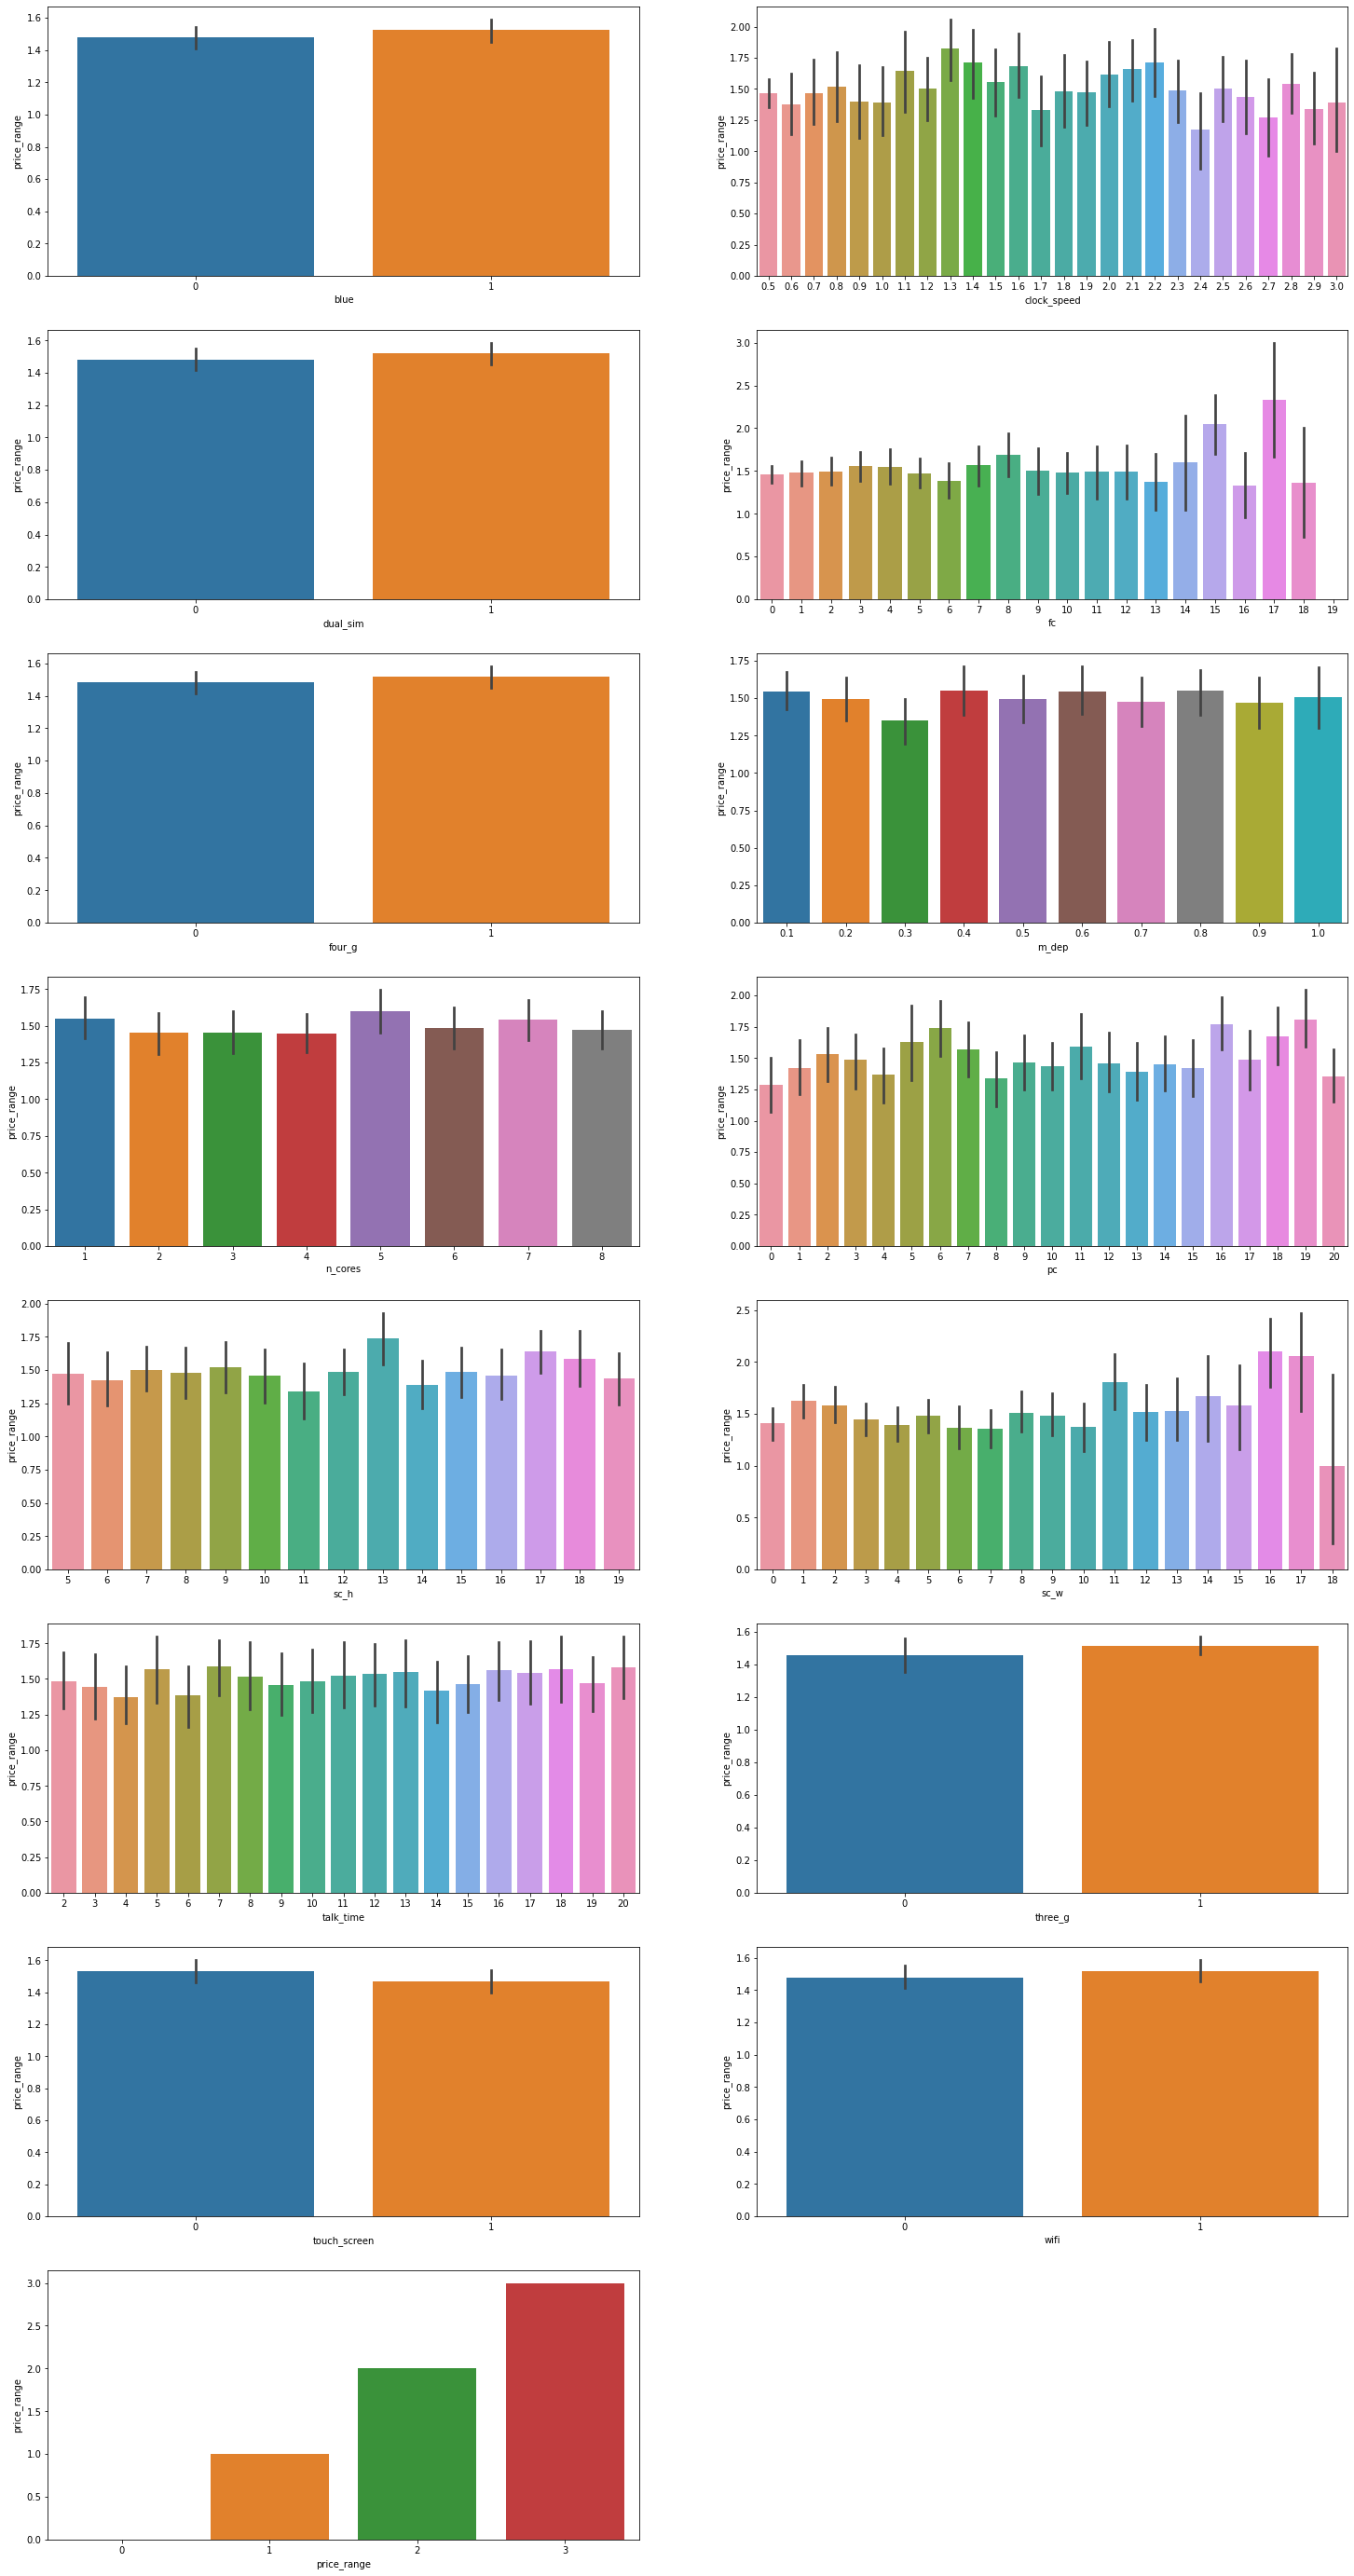

In [89]:
plt.figure(figsize=(25,50))
for i in enumerate(discreate_numerical):
    plt.subplot(8,2,i[0]+1)
    sns.barplot(dataset[i[1]],dataset['price_range'])
    plt.xlabel(i[1])

here we can see most of the features are categorised in numbers

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nandh\anacond

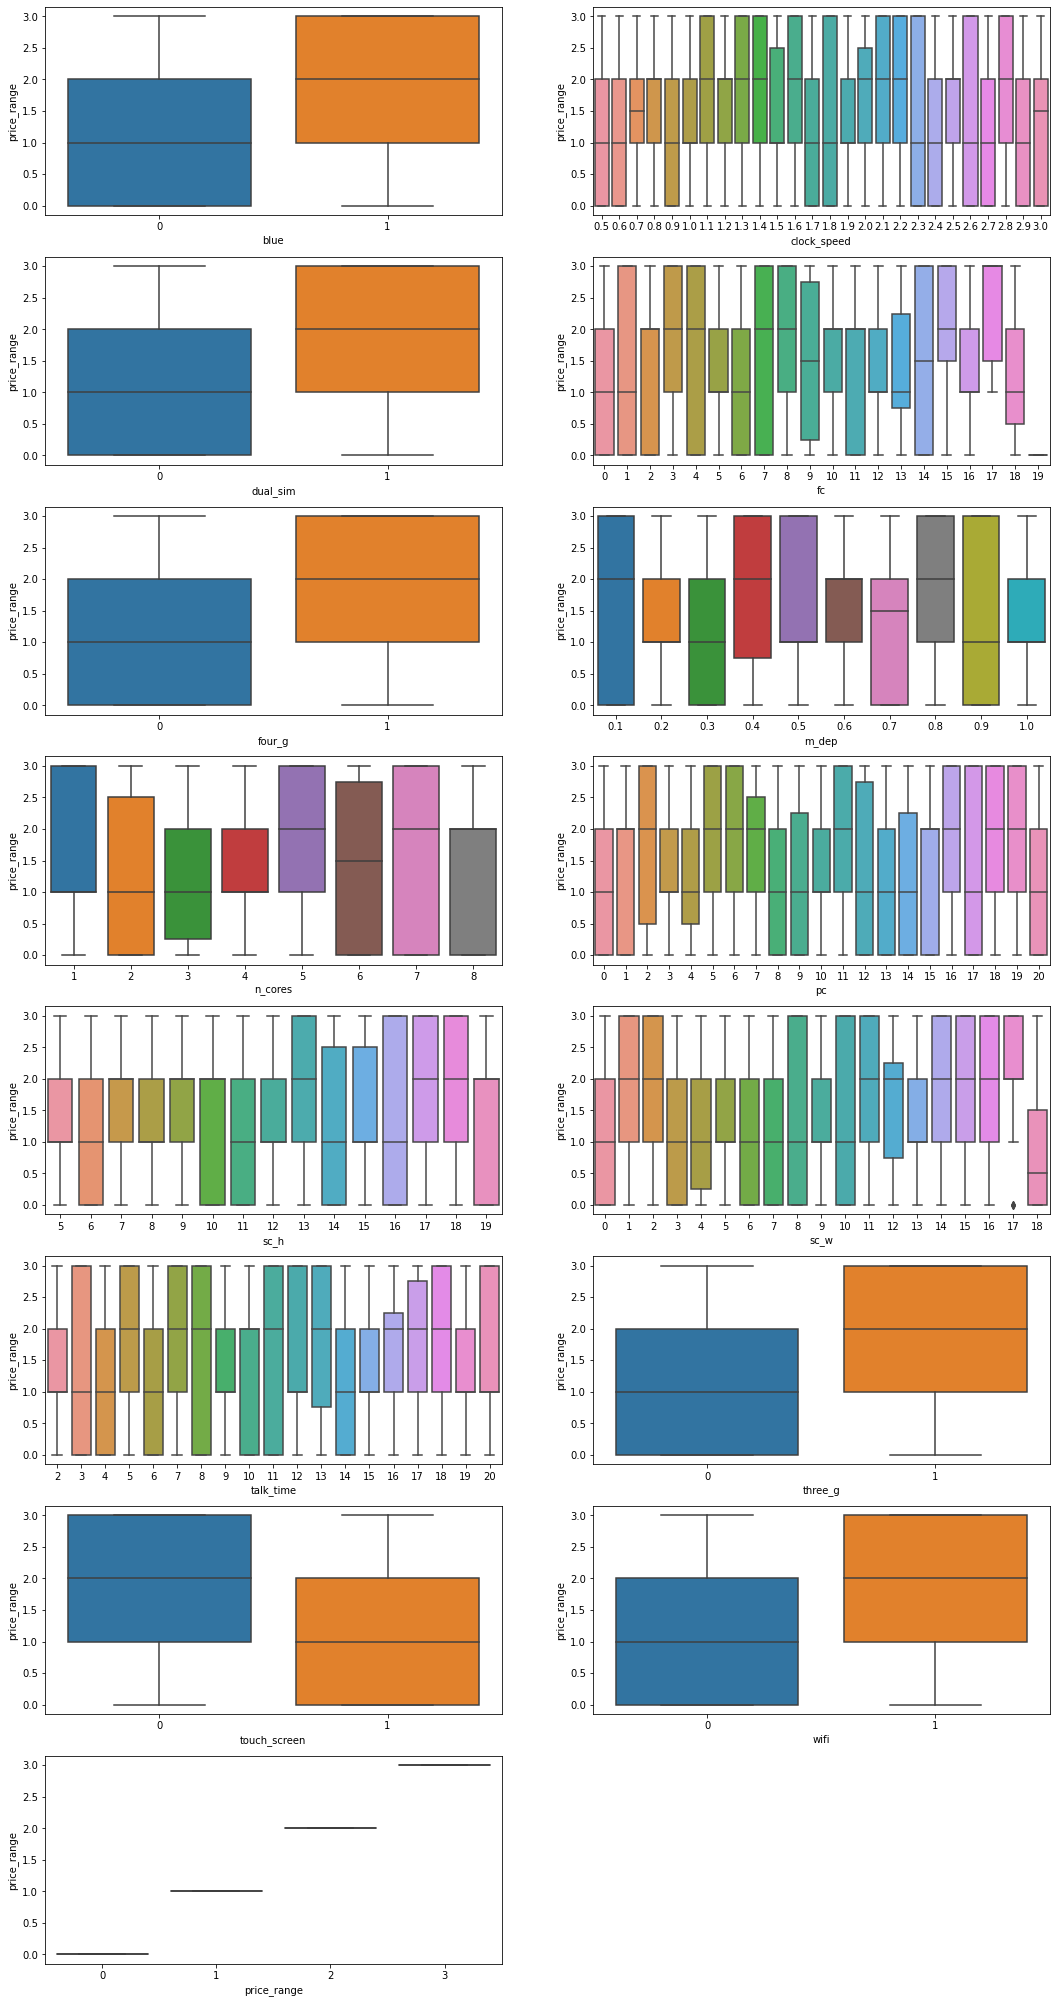

In [90]:
plt.figure(figsize=(18,36))
for i in enumerate(discreate_numerical):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(dataset[i[1]],dataset['price_range'])
    plt.xlabel(i[1])

we can see from the above the box plot for every features varies huge this indicates most of the features are providing information for result

Lets do analysis for Numerical features

In [91]:
numerical_fet = []

for i in dataset.columns:
    if i  not in discreate_numerical:
        numerical_fet.append(i)


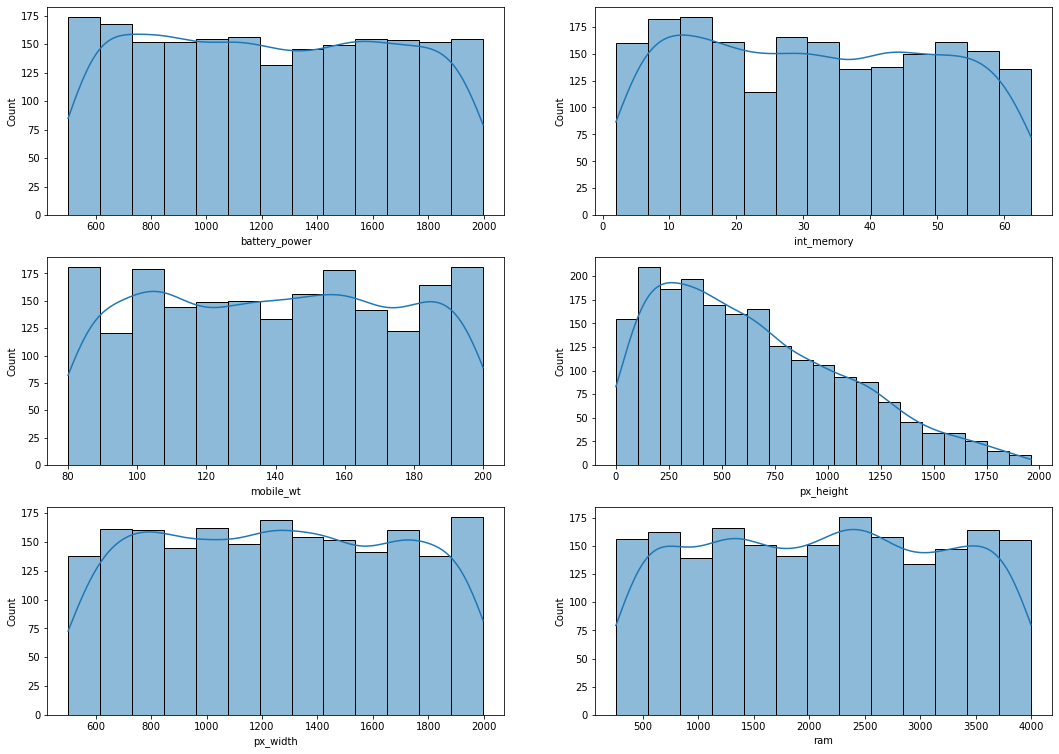

In [92]:
plt.figure(figsize=(18,36))
for i in enumerate(numerical_fet):
    plt.subplot(8,2,i[0]+1)
    sns.histplot(dataset[i[1]],kde=True)
    plt.xlabel(i[1])

Here we can see only px_height shows a right skewed distribution

###### Lets analyse the corelation between these pics

<AxesSubplot:>

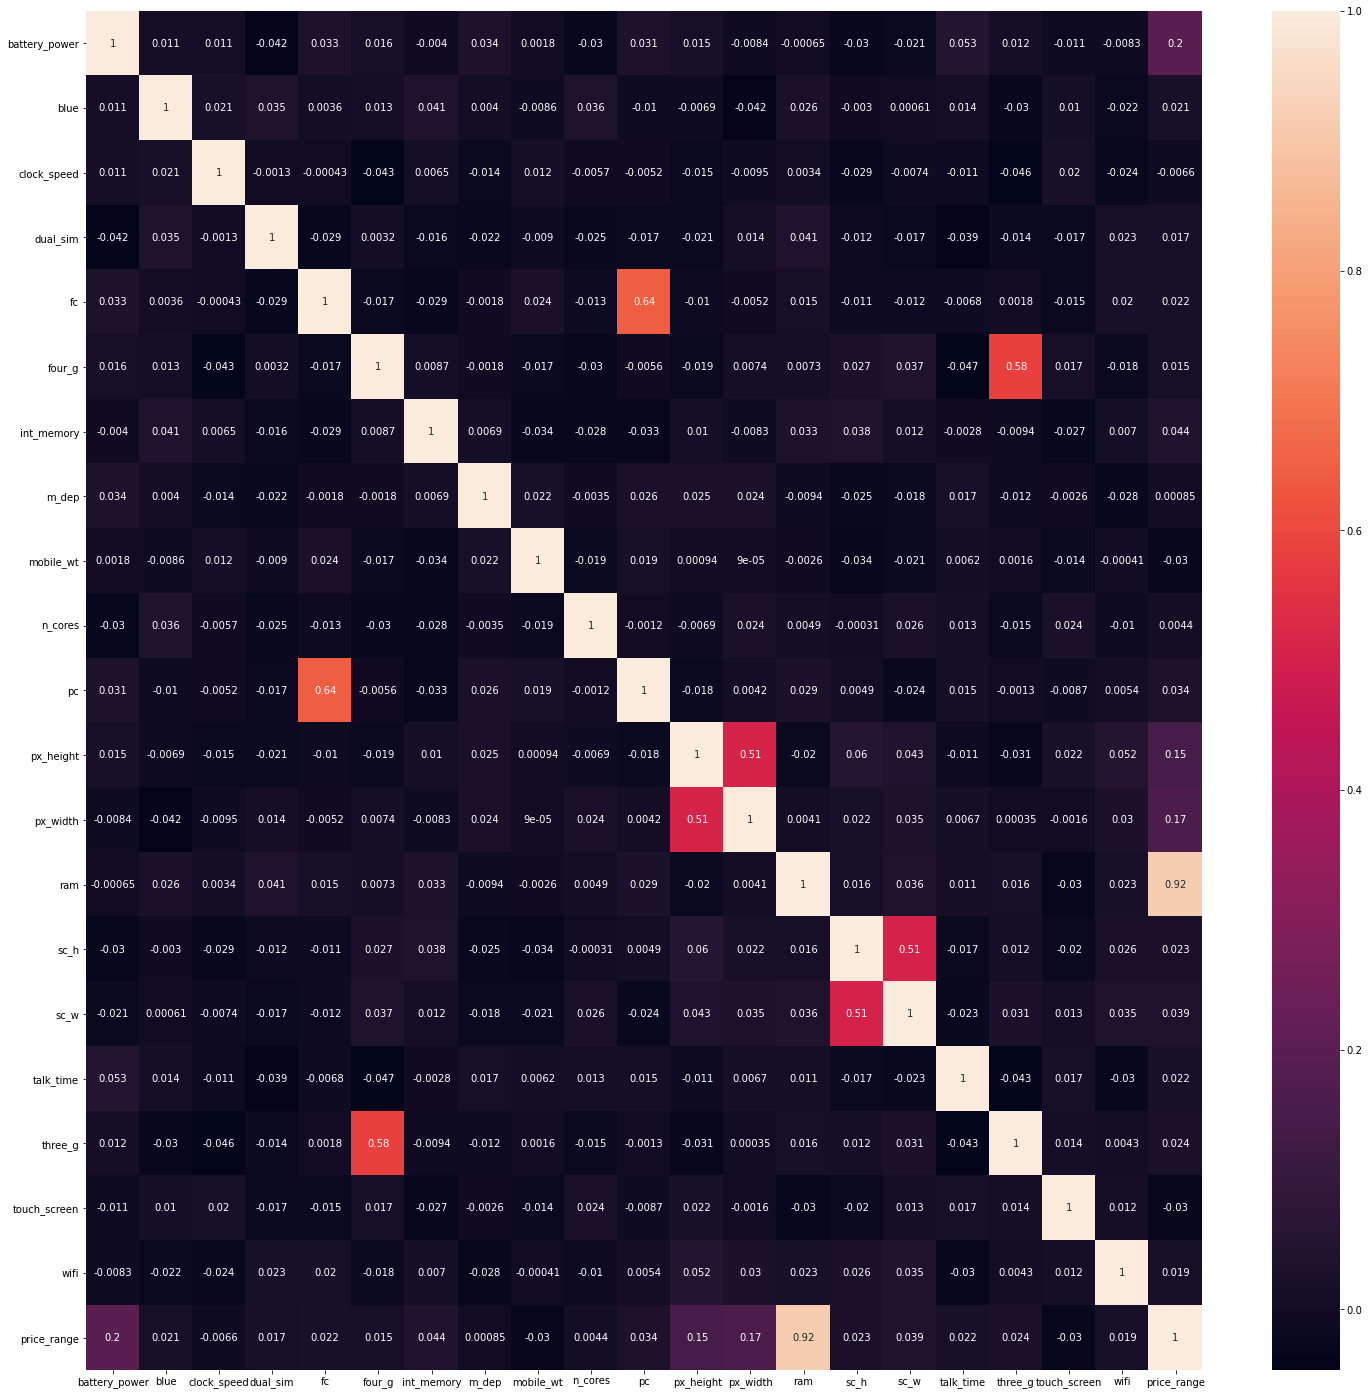

In [93]:
plt.figure(figsize=(25,25))
sns.heatmap(dataset.corr(),annot=True)

 We can see here that Ram is highly co related with Price

Since most of the values independent of each other lets get to feature selection

In [94]:
y = dataset['price_range']
dataset.drop(['price_range'],axis=1,inplace=True)

0.8666666666666667


<AxesSubplot:>

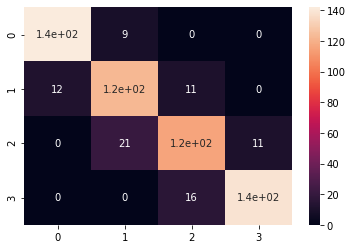

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

x_tr,x_te,y_tr,y_te = train_test_split(dataset,y,test_size=0.3,random_state=42)

cla = RandomForestClassifier()
cla.fit(x_tr,y_tr)
acuracy = accuracy_score(y_te,cla.predict(x_te))
cm =confusion_matrix(y_te,cla.predict(x_te))
print(acuracy)
sns.heatmap(cm,annot=True)

Here we are getting accuracy of 0.865 and we can also see that many features affect the prediction

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selc_ten = SelectKBest(chi2,k=10).fit(x_tr,y_tr)

In [97]:
print(selc_ten.scores_)
for i in range(len(dataset.columns)):
    print(dataset.columns[i],' :    ',selc_ten.scores_[i] )

[1.01757960e+04 4.81259294e-01 1.22550663e+00 7.58327074e-01
 1.40097534e+01 1.11328901e+00 1.29886693e+02 1.01047174e+00
 5.83136275e+01 1.76894150e+00 9.66696670e+00 1.27828009e+04
 6.83695367e+03 6.49917287e+05 7.56122723e+00 1.33071663e+01
 7.79008964e+00 8.05537200e-01 2.23306807e+00 1.37534847e+00]
battery_power  :     10175.79598208065
blue  :     0.4812592944194067
clock_speed  :     1.2255066345342396
dual_sim  :     0.7583270738976033
fc  :     14.00975339970201
four_g  :     1.1132890125033068
int_memory  :     129.88669334262
m_dep  :     1.010471740887278
mobile_wt  :     58.31362752743583
n_cores  :     1.7689414966582124
pc  :     9.66696670475941
px_height  :     12782.80091015348
px_width  :     6836.953666584517
ram  :     649917.2871970823
sc_h  :     7.561227234199759
sc_w  :     13.30716632516532
talk_time  :     7.790089641969961
three_g  :     0.8055372004708874
touch_screen  :     2.2330680679321295
wifi  :     1.375348473387367


selecting most important features from the list based on their value

battery_power,ram,mobile_wt,px_height,px_width,fc,pc,sc_w,talk_time,int_memory

the above 10 features affect the model most 

In [98]:
X_tr = selc_ten.transform(x_tr)
X_te = selc_ten.transform(x_te)

In [99]:
clf_2 = RandomForestClassifier()

In [100]:
clf_2.fit(x_tr,y_tr)

RandomForestClassifier()

In [101]:
accuracy_score(y_te,clf_2.predict(x_te))

0.8583333333333333

here im getting accuracy .875 increased when compared to preivious

<AxesSubplot:>

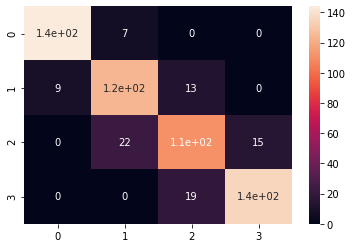

In [102]:
cm1 = confusion_matrix(y_te,clf_2.predict(x_te))
sns.heatmap(cm1,annot=  True)

from the above model we can see that unwanted features giving us  type 1 and type 2 errors are minimizsed 

Lets see wat can we do if we want to increase more



#### Recursive feature elimination with cross validation and random forest classification
In previous method we found how many features we needed most by our own choice,

But in this method we can find how many features can give best accuracy and the choice is made by cross validation

In [103]:
from sklearn.feature_selection import RFECV

clf_3 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_3,cv=5, step=1,scoring='accuracy')
rfecv.fit(x_tr,y_tr)

RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

In [104]:
print(rfecv.n_features_)

5


here it took 5 features to make the model to be optimized

In [105]:
print(x_tr.columns[rfecv.support_])

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')


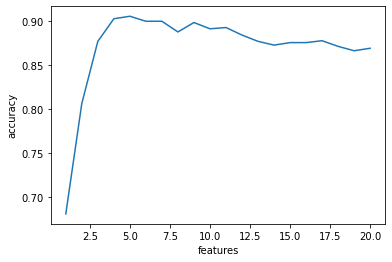

In [106]:
plt.figure()
plt.xlabel('features')
plt.ylabel('accuracy')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)


here we can see at 5 we are getting maximum accuracy, so we will be choosing 5 features for prediction

###### Now lets predict for test data

###### Recursive feature elimination with cross validation and random forest classification

In [181]:
x_test  =pd.read_csv('test.csv')
from sklearn.feature_selection import RFECV
cls_final =RandomForestClassifier()
refecv_final = RFECV(estimator=cls_final,cv=3,step=1,scoring='accuracy')
refecv_final.fit(dataset,y)

RFECV(cv=3, estimator=RandomForestClassifier(), scoring='accuracy')

In [ ]:
x_test.drop('id',axis=1,inplace=True)

In [188]:

x_test.shape

(1000, 20)

In [189]:
dataset.shape

(2000, 20)

In [190]:
clf_4.fit(dataset,y)

RandomForestClassifier()

In [192]:
p = clf_4.predict(x_test)

0.245